In [18]:
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from IPython.display import Video
import matplotlib.pyplot as plt

In [2]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')

In [3]:
env.reset()

(array([-0.41893476,  0.        ], dtype=float32), {})

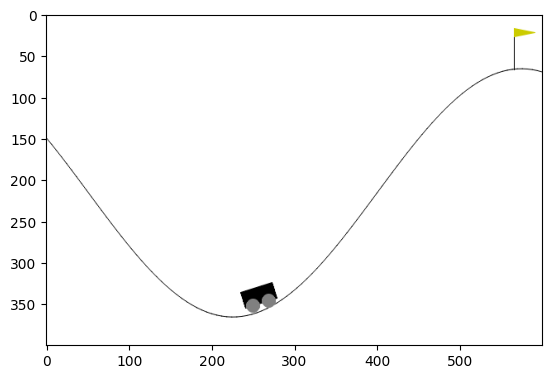

In [4]:
plt.imshow(env.render())

In [5]:
high = env.unwrapped.high

In [6]:
low = env.unwrapped.low

In [7]:
low, high

(array([-1.2 , -0.07], dtype=float32), array([0.6 , 0.07], dtype=float32))

In [45]:
NUM_BINS = 20
discrete_width = np.abs((low)/NUM_BINS)
discrete_width

array([0.06  , 0.0035], dtype=float32)

In [38]:
NUM_ACTIONS = 3
# 0 -> Accelerate Left
# 1 -> Don't Accelerate
# 2 -> Accelerate Right

In [46]:
def get_discrete_state(continuous_state):
    return tuple(continuous_state - (continuous_state % discrete_width))

In [47]:
NUM_EPISODES = 100000
epsilon = 0.1
alpha = 0.1
gamma = 0.99
Q_Table = dict()

# DIDN'T CHECK FOR CONVERGENCE

for episode in range(NUM_EPISODES):
    current_state = get_discrete_state(env.reset()[0])
    
    while True:
        # One Episode
        Q_Table[current_state] = Q_Table.get(current_state, np.zeros(NUM_ACTIONS))
        greedy_action = np.argmax(Q_Table[current_state])
        action = greedy_action
        
        if np.random.rand() < epsilon:
            # EXPLORE
            while action==greedy_action:
                action = np.random.randint(NUM_ACTIONS)
        
        new_state, reward, terminated, truncated, info = env.step(action)
    
        if terminated or truncated:
            break
        else:
            # Update Q Values
            new_state = get_discrete_state(new_state)
            Q_Table[new_state] = Q_Table.get(new_state, np.zeros(NUM_ACTIONS))
            Q_Table[current_state][action] += alpha*(reward + gamma*np.max(Q_Table[new_state]) - Q_Table[current_state][action])
            current_state = new_state

In [48]:
print(f"Q Table has a total of {len(Q_Table)} states!")

len(Q Table has a total of 899 states!


In [49]:
eval_env = gym.make('MountainCar-v0', render_mode='rgb_array')
eval_env = RecordVideo(eval_env, 'video', episode_trigger=lambda x : x==2)

current_state = get_discrete_state(eval_env.reset()[0])
eval_env.start_video_recorder()
while True:
    q_val = Q_Table.get(current_state, np.zeros(NUM_ACTIONS))
    action = np.argmax(q_val)
    new_state, reward, terminated, truncated, info = eval_env.step(action)
    if terminated:
        print("Successfuly Reached The Goal!")
        done = True
        break
    if truncated:
        print("Couldn't Reach The Goal!")
        break
    current_state = get_discrete_state(new_state)
eval_env.close_video_recorder()
eval_env.close()

Moviepy - Building video /home/dean/Documents/ReinforcementLearning/Book/video/rl-video-episode-0.mp4.
Moviepy - Writing video /home/dean/Documents/ReinforcementLearning/Book/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/dean/Documents/ReinforcementLearning/Book/video/rl-video-episode-0.mp4
Successfuly Reached The Goal!


In [50]:
Video("./video/rl-video-episode-0.mp4")